<a href="https://colab.research.google.com/github/kkn990929/iM_DiGital_Banker_Academy/blob/ML3-0826/%EB%94%A5%EB%9F%AC%EB%8B%9D%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%20%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [13]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

train_x, test_x, train_y, test_y = train_test_split(x, y)

mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

train_scaled = (train_x - mean) / std
test_scaled = (test_x - mean) / std

In [4]:
model = keras.Sequential() # 인공신경망 설계하기위한 도화지
model.add(keras.layers.Dense(5, activation = 'sigmoid', input_shape = (4,))) # 은닉층
model.add(keras.layers.Dense(3, activation = 'softmax')) # 출력층

model.compile(loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'],
              optimizer = 'adam') # sparse_categorical_crossentropy함수로 정확도를 보고 adam으로 학습률 조절

hist = model.fit(train_scaled, train_y,
                 epochs = 1000,
                 validation_data = (test_scaled, test_y)) # 1000번 학습하면서 test_scaled, test_y로 중간에 검증할것

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.3330 - loss: 1.1627 - val_accuracy: 0.2895 - val_loss: 1.1905
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3435 - loss: 1.1403 - val_accuracy: 0.2895 - val_loss: 1.1819
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3455 - loss: 1.1341 - val_accuracy: 0.2895 - val_loss: 1.1730
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3435 - loss: 1.1284 - val_accuracy: 0.2895 - val_loss: 1.1643
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3685 - loss: 1.1162 - val_accuracy: 0.2895 - val_loss: 1.1560
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3528 - loss: 1.1169 - val_accuracy: 0.2895 - val_loss: 1.1481
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3872 - loss: 1.0798 - val_accuracy: 0.2895 - val_loss: 1.1408
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3435 - loss: 1.0926 - val_accuracy: 0.2895 - v

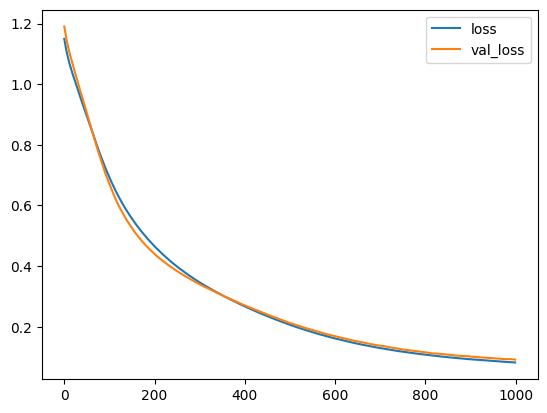

In [5]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [21]:
import pandas as pd

pima = pd.read_csv("/content/pima_indians.csv")

X = pima.iloc[:, :-1].to_numpy()
Y = pima['Class'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, Y)

mean = train_x.mean(axis = 0)
std = train_x.std(axis = 0)

train_scaled = (train_x - mean) / std
test_scaled = (test_x - mean) / std

model = keras.Sequential()
model.add(keras.layers.Dense(16, activation = 'sigmoid', input_shape = (8,)))
model.add(keras.layers.Dense(2, activation = 'softmax'))

model.compile(loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'],
              optimizer = 'adam')

hist = model.fit(train_scaled, train_y,
                 epochs = 500,
                 validation_data = (test_scaled, test_y))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6517 - loss: 0.6572 - val_accuracy: 0.7083 - val_loss: 0.6120
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6888 - loss: 0.6144 - val_accuracy: 0.6927 - val_loss: 0.5862
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6715 - loss: 0.5997 - val_accuracy: 0.7135 - val_loss: 0.5705
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7109 - loss: 0.5805 - val_accuracy: 0.7083 - val_loss: 0.5574
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.5713 - val_accuracy: 0.7240 - val_loss: 0.5450
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6938 - loss: 0.5742 - val_accuracy: 0.7500 - val_loss: 0.5348
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7079 - loss: 0.5512 - val_accuracy: 0.7656 - val_loss: 0.5257
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.5582 - val_accuracy: 0.7552 - 

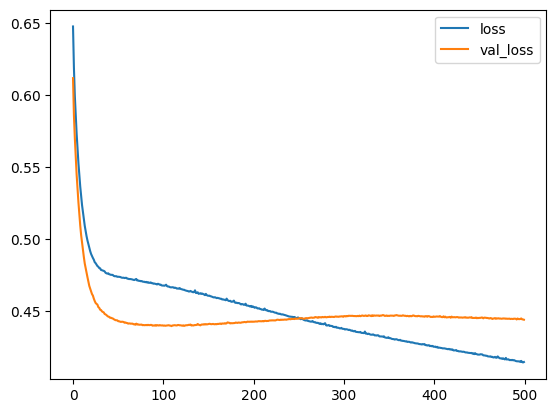

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# 주확색 선이 올라가고 있음 -> 과대적합

In [23]:
# 그림그리지 않고 성능평가
model.evaluate(test_scaled, test_y)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.4131 


[0.4442250728607178, 0.7916666865348816]

In [24]:
# 성능만 보고 (시각화 보지않고) 모델을 복잡하게

import pandas as pd

pima = pd.read_csv("/content/pima_indians.csv")

X = pima.iloc[:, :-1].to_numpy()
Y = pima['Class'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, Y)

mean = train_x.mean(axis = 0)
std = train_x.std(axis = 0)

train_scaled = (train_x - mean) / std
test_scaled = (test_x - mean) / std

model = keras.Sequential()
model.add(keras.layers.Dense(16, activation = 'relu', input_shape = (8,)))
model.add(keras.layers.Dense(32, activation = 'relu', )) # relu 함수로 더 복잡하게
model.add(keras.layers.Dense(32, activation = 'relu', )) # relu 함수로 더 복잡하게
model.add(keras.layers.Dense(2, activation = 'softmax')) # relu 함수로 더 복잡하게

model.compile(loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'],
              optimizer = 'adam')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
hist = model.fit(train_scaled, train_y,
                 epochs = 500,
                 validation_data = (test_scaled, test_y))

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6470 - loss: 0.6695 - val_accuracy: 0.6510 - val_loss: 0.6218
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6764 - loss: 0.6248 - val_accuracy: 0.6562 - val_loss: 0.5915
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6793 - loss: 0.5930 - val_accuracy: 0.6875 - val_loss: 0.5684
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7350 - loss: 0.5460 - val_accuracy: 0.6979 - val_loss: 0.5517
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7425 - loss: 0.5147 - val_accuracy: 0.6979 - val_loss: 0.5416
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7634 - loss: 0.4809 - val_accuracy: 0.7031 - val_loss: 0.5352
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7454 - loss: 0.4690 - val_accuracy: 0.7031 - val_loss: 0.5360
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7701 - loss: 0.4692 - val_accuracy: 0.7135 - 

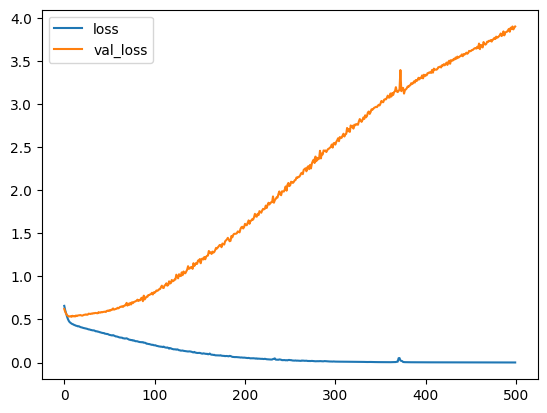

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# 주확색 선이 올라가고 있음 -> 과대적합

In [28]:
# 모델을 깔끔하게



import pandas as pd

pima = pd.read_csv("/content/pima_indians.csv")

X = pima.iloc[:, :-1].to_numpy()
Y = pima['Class'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, Y)

mean = train_x.mean(axis = 0)
std = train_x.std(axis = 0)

train_scaled = (train_x - mean) / std
test_scaled = (test_x - mean) / std

model = keras.Sequential()
model.add(keras.layers.Dense(16, activation = 'sigmoid', input_shape = (8,)))
model.add(keras.layers.Dropout(0.3)) # 랜덤으로 30개의 노드를 꺼버림 for 학습
model.add(keras.layers.Dense(32, activation = 'sigmoid', )) # relu 함수로 더 복잡하게
model.add(keras.layers.Dropout(0.3)) # 랜덤으로 30개의 노드를 꺼버림 for 학습
model.add(keras.layers.Dense(32, activation = 'sigmoid', )) # relu 함수로 더 복잡하게
model.add(keras.layers.Dropout(0.3)) # 랜덤으로 30개의 노드를 꺼버림 for 학습
model.add(keras.layers.Dense(2, activation = 'softmax')) # relu 함수로 더 복잡하게
# relu -> 출력층에서 미분해서 입력층으로 배달할 수 있음?
# 학습 방해 -> sigmoid
# 꼭 relu안 써도 됨

model.compile(loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'],
              optimizer = 'adam')

hist = model.fit(train_scaled, train_y,
                 epochs = 500,
                 validation_data = (test_scaled, test_y))

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5278 - loss: 0.7327 - val_accuracy: 0.6667 - val_loss: 0.6341
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5973 - loss: 0.6961 - val_accuracy: 0.6667 - val_loss: 0.6332
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6175 - loss: 0.6776 - val_accuracy: 0.6667 - val_loss: 0.6320
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6246 - loss: 0.6531 - val_accuracy: 0.6667 - val_loss: 0.6309
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5861 - loss: 0.6967 - val_accuracy: 0.6667 - val_loss: 0.6310
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6361 - loss: 0.6438 - val_accuracy: 0.6667 - val_loss: 0.6286
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6457 - loss: 0.6421 - val_accuracy: 0.6667 - val_loss: 0.6297
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5835 - loss: 0.6851 - val_accuracy: 0.6667 - val_loss: 0.

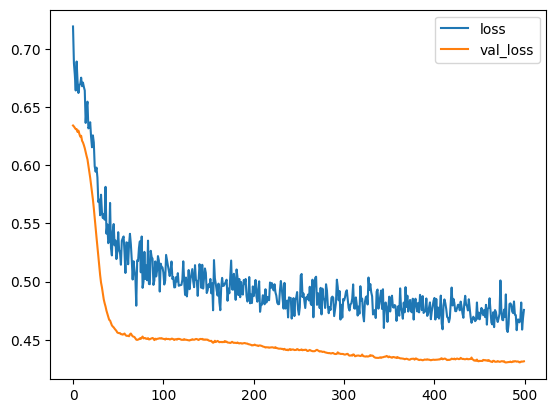

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# 과대적합 방지 -> 학습을 방해하자!
# Val-loss 가 억눌리는 느낌

In [30]:
# 은닉층 하나 지우고



import pandas as pd

pima = pd.read_csv("/content/pima_indians.csv")

X = pima.iloc[:, :-1].to_numpy()
Y = pima['Class'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, Y)

mean = train_x.mean(axis = 0)
std = train_x.std(axis = 0)

train_scaled = (train_x - mean) / std
test_scaled = (test_x - mean) / std

model = keras.Sequential()
model.add(keras.layers.Dense(16, activation = 'relu', input_shape = (8,)))
model.add(keras.layers.Dropout(0.3)) # 랜덤으로 30개의 노드를 꺼버림 for 학습
# model.add(keras.layers.Dense(32, activation = 'sigmoid', )) # relu 함수로 더 복잡하게
# model.add(keras.layers.Dropout(0.3)) # 랜덤으로 30개의 노드를 꺼버림 for 학습  -> 층 하나 지우자
model.add(keras.layers.Dense(32, activation = 'relu', )) # relu 함수로 더 복잡하게
model.add(keras.layers.Dropout(0.3)) # 랜덤으로 30개의 노드를 꺼버림 for 학습
model.add(keras.layers.Dense(2, activation = 'softmax')) # relu 함수로 더 복잡하게
# relu -> 출력층에서 미분해서 입력층으로 배달할 수 있음?
# 학습 방해 -> sigmoid
# 꼭 relu안 써도 됨

model.compile(loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'],
              optimizer = 'adam')

hist = model.fit(train_scaled, train_y,
                 epochs = 500,
                 validation_data = (test_scaled, test_y))

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - accuracy: 0.4207 - loss: 0.7755 - val_accuracy: 0.6406 - val_loss: 0.6509
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5828 - loss: 0.6746 - val_accuracy: 0.7292 - val_loss: 0.6070
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6443 - loss: 0.6436 - val_accuracy: 0.7344 - val_loss: 0.5821
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6843 - loss: 0.6123 - val_accuracy: 0.7292 - val_loss: 0.5631
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6997 - loss: 0.5862 - val_accuracy: 0.7500 - val_loss: 0.5491
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6991 - loss: 0.5729 - val_accuracy: 0.7500 - val_loss: 0.5382
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7119 - loss: 0.5577 - val_accuracy: 0.7500 - val_loss: 0.5296
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6777 - loss: 0.5853 - val_accuracy: 0.7448 - val_loss: 0

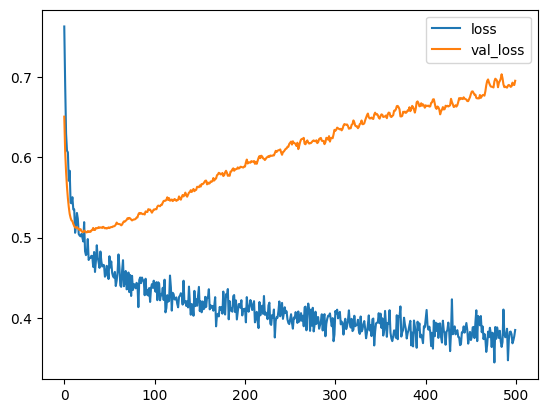

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# 과대적합 방지 -> 학습을 방해하자! or 은닉층을 지우자
# Val-loss 가 억눌리는 느낌

In [34]:
# 과대적합 시작 부분 저장하는 모델
# 은닉층 하나 지우고



import pandas as pd

pima = pd.read_csv("/content/pima_indians.csv")

X = pima.iloc[:, :-1].to_numpy()
Y = pima['Class'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, Y)

mean = train_x.mean(axis = 0)
std = train_x.std(axis = 0)

train_scaled = (train_x - mean) / std
test_scaled = (test_x - mean) / std

model = keras.Sequential()
model.add(keras.layers.Dense(16, activation = 'relu', input_shape = (8,)))
model.add(keras.layers.Dropout(0.3)) # 랜덤으로 30개의 노드를 꺼버림 for 학습
# model.add(keras.layers.Dense(32, activation = 'sigmoid', )) # relu 함수로 더 복잡하게
# model.add(keras.layers.Dropout(0.3)) # 랜덤으로 30개의 노드를 꺼버림 for 학습  -> 층 하나 지우자
model.add(keras.layers.Dense(32, activation = 'relu', )) # relu 함수로 더 복잡하게
model.add(keras.layers.Dropout(0.3)) # 랜덤으로 30개의 노드를 꺼버림 for 학습
model.add(keras.layers.Dense(2, activation = 'softmax')) # relu 함수로 더 복잡하게
# relu -> 출력층에서 미분해서 입력층으로 배달할 수 있음?
# 학습 방해 -> sigmoid
# 꼭 relu안 써도 됨

es = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
# 조기종료 / 5번 정도 참아보고 그 뒤로 또 과대적합 나면 멈춰라(저장해라)
# restore_best_weights -> 5번 참았던거 빼고 저장함


model.compile(loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'],
              optimizer = 'adam')

hist = model.fit(train_scaled, train_y,
                 epochs = 500,
                 validation_data = (test_scaled, test_y),
                 callbacks = [es])
#

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5307 - loss: 0.7120 - val_accuracy: 0.7083 - val_loss: 0.6409
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6472 - loss: 0.6565 - val_accuracy: 0.7188 - val_loss: 0.6020
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7251 - loss: 0.5547 - val_accuracy: 0.7292 - val_loss: 0.5746
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7221 - loss: 0.5737 - val_accuracy: 0.7396 - val_loss: 0.5549
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7179 - loss: 0.5377 - val_accuracy: 0.7500 - val_loss: 0.5412
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6710 - loss: 0.5777 - val_accuracy: 0.7396 - val_loss: 0.5347
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6848 - loss: 0.5879 - val_accuracy: 0.7292 - val_loss: 0.5316
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7593 - loss: 0.5137 - val_accuracy: 0.7292 - val_loss: 0.

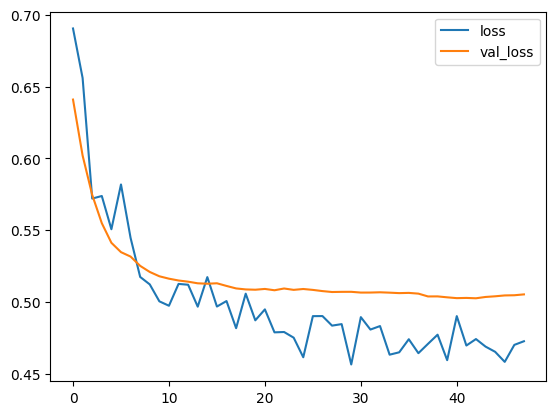

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# 과대적합 방지 -> 학습을 방해하자! or 은닉층을 지우자
# Val-loss 가 억눌리는 느낌

In [36]:
model.evaluate(test_scaled, test_y)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7807 - loss: 0.4970 


[0.5025627613067627, 0.7552083134651184]